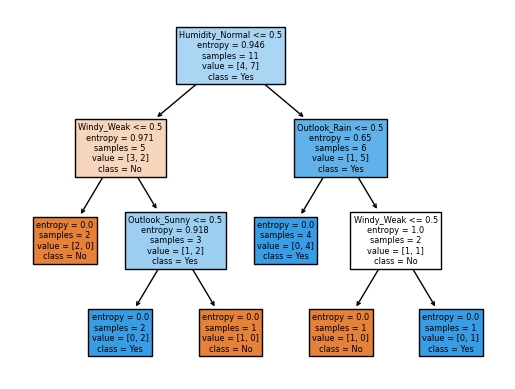

Accuracy: 0.6666666666666666
Classification Report:
               precision    recall  f1-score   support

          No       0.50      1.00      0.67         1
         Yes       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3

Cross-Validation Scores :
 [0.66666667 1.         0.66666667 0.33333333 1.        ]
Mean CV Accuracy : 0.7333333333333333


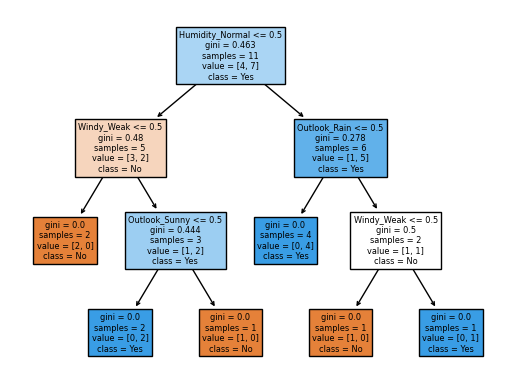

Accuracy: 0.6666666666666666
Classification Report:
               precision    recall  f1-score   support

          No       0.50      1.00      0.67         1
         Yes       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3

Cross-Validation Scores :
 [0.66666667 1.         0.66666667 0.33333333 1.        ]
Mean CV Accuracy : 0.7333333333333333


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

df = pd.read_csv('weather.csv')
df.head()

encoder = OneHotEncoder(drop='first')
X = encoder.fit_transform(df.drop('Play', axis=1)).toarray()
y = df['Play']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def dt(criterion):
    clf = DecisionTreeClassifier(criterion=criterion, random_state=42)
    clf.fit(X_train, y_train)
    plot_tree(clf, filled=True, feature_names=encoder.get_feature_names_out(['Outlook', 'Temperature', 'Humidity', 'Windy']), class_names=['No', 'Yes'])
    plt.show()
    y_pred = clf.predict(X_test)
    print("Accuracy:",accuracy_score(y_test, y_pred))
    print("Classification Report:\n",classification_report(y_test, y_pred))
    cv_scores = cross_val_score(clf, X, y, cv=5)
    print("Cross-Validation Scores :\n", cv_scores)
    print("Mean CV Accuracy :", cv_scores.mean())
    

    
dt('entropy')
dt('gini')